## Real or not?
## NLP with Disaster Tweets

Predict which Tweets are about real disasters and which ones are not

#### 1. Reading data

In [38]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # basic visualisation library
import seaborn as sns # advanced and nice visualisations
import warnings # library to manage wornings
from wordcloud import WordCloud, STOPWORDS # library to create a wordcloud

warnings.simplefilter(action='ignore', category=FutureWarning) # silencing FutureWarnings out

print("numpy version: {}".format(np.__version__))
print("pandas version: {}".format(pd.__version__))
print("seaborn version: {}".format(sns.__version__))

numpy version: 1.17.4
pandas version: 0.24.2
seaborn version: 0.9.0


In [39]:
train_data = pd.read_csv('C:\\Users\\maryam\\Desktop\\Python Program\\Deep Learning\\Natural Language Processing\\train.csv')
test_data = pd.read_csv('C:\\Users\\maryam\\Desktop\\Python Program\\Deep Learning\\Natural Language Processing\\test.csv') 

print('There are {} rows and {} columns in a training dataset.'.format(train_data.shape[0],train_data.shape[1]))
print('There are {} rows and {} columns in a testing dataset.'.format(test_data.shape[0],test_data.shape[1]))

There are 7613 rows and 5 columns in a training dataset.
There are 3263 rows and 4 columns in a testing dataset.


#### 2. Exploratory Data Analysis

In [40]:
train_data.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


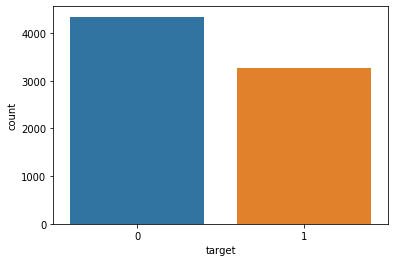

In [41]:
sns.countplot(train_data['target'])

In [42]:
train_data.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [43]:
missing_variable=['keyword','location']

In [44]:
train_none=train_data[missing_variable].isna().sum()/len(train_data)*100
train_none

keyword      0.801261
location    33.272035
dtype: float64

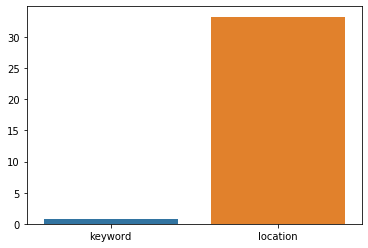

In [45]:
sns.barplot(x=train_none.index,y=train_none.values)

#### 3. Tokenization and Features Engineering

In [46]:
from nltk.tokenize import sent_tokenize, word_tokenize, regexp_tokenize # funtions for standard tokenisation
from nltk.tokenize import TweetTokenizer # function for tweets tokenization

Below there are 5 new columns that will be created:


words count (all)

numbers count

hashtags count

mentions count

mean length of words

In [47]:
tknzr = TweetTokenizer() # initialization of Tweet Tokenizer

def mean_words_length(text):
    words = word_tokenize(text)
    word_lengths = [len(w) for w in words]
    return round(np.mean(word_lengths),1)

# words count
train_data['words_count'] = train_data['text'].apply(lambda x: len(tknzr.tokenize(x))) # number of words in tweet

# numbers count
numbers_regex = r"(\d+\.?,?\s?\d+)"
train_data['numbers_count'] = train_data['text'].apply(lambda x: len(regexp_tokenize(x, numbers_regex))) # count of extracted mentions

# hashtags count
hashtags_regex = r"#\w+"
train_data['hashtags_count'] = train_data['text'].apply(lambda x: len(regexp_tokenize(x, hashtags_regex))) # count of extracted hashtags

# mentions count
mentions_regex = r"@\w+"
train_data['mentions_count'] = train_data['text'].apply(lambda x: len(regexp_tokenize(x, mentions_regex))) # count of extracted mentions

# mean words length
train_data['mean_words_length'] = train_data['text'].apply(mean_words_length) # count of extracted mentions

# mean words length
train_data['characters_count'] = train_data['text'].apply(lambda x: len(x)) # count of extracted mentions

In [48]:
train_data.head(5)

,id,keyword,location,text,target,words_count,numbers_count,hashtags_count,mentions_count,mean_words_length,characters_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,0,1,0,4.1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,8,0,0,0,4.0,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,25,0,0,0,4.7,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,1,1,0,6.3,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,0,2,0,4.0,88


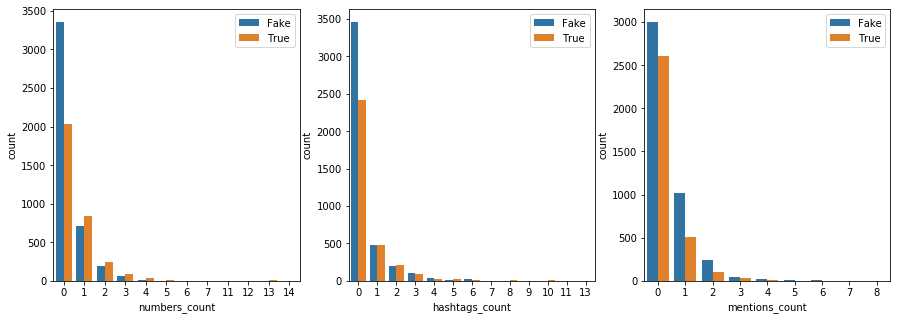

In [49]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,5))

sns.countplot(x='numbers_count', hue='target', data=train_data, ax=ax1)
ax1.legend(labels=['Fake','True'], loc=1)

sns.countplot(x='hashtags_count', hue='target', data=train_data, ax=ax2)
ax2.legend(labels=['Fake','True'], loc=1)

sns.countplot(x='mentions_count', hue='target', data=train_data, ax=ax3)
ax3.legend(labels=['Fake','True'], loc=1)

plt.show()

A barchart above shows that fake tweets have bigger count of numbers, hashtags amd mentions. It may be a way to increase the spreading speed of fake news (my theory).

In [50]:
from nltk.corpus import stopwords
import string

# lowercase tokens
train_data['lowercase_bag_o_w'] = train_data['text'].apply(lambda x: [w for w in tknzr.tokenize(x.lower())])

# stopwords
train_data['stopwords'] = train_data['lowercase_bag_o_w'].apply(lambda x: [t for t in x if t in stopwords.words('english')])

# stopwords count
train_data['stopwords_count'] = train_data['stopwords'].apply(lambda x: len(x))

# alpha words only (excludes mentions and hashtags)
train_data['alpha_only'] = train_data['lowercase_bag_o_w'].apply(lambda x: [t for t in x if t.isalpha()])

# counts of alpha words only
train_data['alpha_count'] = train_data['alpha_only'].apply(lambda x: len(x))

# counts of punctuation marks only
punctuation_regex = r"[^\w\s]"
train_data['punctuation_count'] = train_data['text'].apply(lambda x: len(regexp_tokenize(x, punctuation_regex)))

In [51]:
train_data.head()

,id,keyword,location,text,target,words_count,numbers_count,hashtags_count,mentions_count,mean_words_length,characters_count,lowercase_bag_o_w,stopwords,stopwords_count,alpha_only,alpha_count,punctuation_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,0,1,0,4.1,69,"[our, deeds, are, the, reason, of, this, #eart...","[our, are, the, of, this, all]",6,"[our, deeds, are, the, reason, of, this, may, ...",12,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,8,0,0,0,4.0,38,"[forest, fire, near, la, ronge, sask, ., canada]",[],0,"[forest, fire, near, la, ronge, sask, canada]",7,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,25,0,0,0,4.7,133,"[all, residents, asked, to, ', shelter, in, pl...","[all, to, in, are, being, by, no, other, or, i...",11,"[all, residents, asked, to, shelter, in, place...",22,3
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,1,1,0,6.3,65,"[13,000, people, receive, #wildfires, evacuati...",[in],1,"[people, receive, evacuation, orders, in, cali...",6,2
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,0,2,0,4.0,88,"[just, got, sent, this, photo, from, ruby, #al...","[just, this, from, as, from, into, a]",7,"[just, got, sent, this, photo, from, ruby, as,...",14,2


##### BIGRAMS

In [52]:
from nltk.util import bigrams

train_data['bigrams'] = train_data['lowercase_bag_o_w'].apply(lambda x: list(bigrams(x)))
bigrams = train_data['bigrams'].tolist()
bigrams = list([a for b in bigrams for a in b])

#### 4. XGBoost baseline model

In this section a basic XGBoost classification model will be created. XGBoost is modern state-of-the art boosting algorithm, very popular in many tasks and has a conveninent Scikit-Learn API.

In [53]:
X = train_data.drop(['id','location','bigrams','target','text','lowercase_bag_o_w','stopwords','alpha_only'], axis=1)
y = train_data['target']
X.head(5)

,keyword,words_count,numbers_count,hashtags_count,mentions_count,mean_words_length,characters_count,stopwords_count,alpha_count,punctuation_count
0,NaN,13,0,1,0,4.1,69,6,12,1
1,NaN,8,0,0,0,4.0,38,0,7,1
2,NaN,25,0,0,0,4.7,133,11,22,3
3,NaN,8,1,1,0,6.3,65,1,6,2
4,NaN,16,0,2,0,4.0,88,7,14,2


In [54]:
X = pd.get_dummies(X, prefix=['key'], columns=['keyword'])


In [56]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [57]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [5, 6, 7]
        }

In [60]:
folds = 3  # number of folds to be used
param_comb = 5 # number of parameters combinations

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1)  # define a stratified K-Fold to preserve percentage of each target class

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring=['roc_auc','accuracy','recall','precision'],
                                   n_jobs=4, cv=skf.split(X,y), verbose=2, random_state=1001, refit='roc_auc')

# Alternatively you can perform a full grid search but it will take much longer time
#grid = GridSearchCV(estimator=xgb, param_grid=params, scoring=['roc_auc','accuracy','recall','precision'], n_jobs=4, cv=skf.split(X,y), verbose=3, refit='roc_auc')

random_search.fit(X, y) # fitting


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:  9.9min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000001DDF02722A0>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_child...
                                           validate_parameters=False,
                                           verbosity=None),
                   iid='deprecated', n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree':

In [61]:
random_search.best_params_

{'subsample': 0.8,
 'min_child_weight': 1,
 'max_depth': 6,
 'gamma': 1.5,
 'colsample_bytree': 1.0}

Printing Scores

In [63]:
roc_auc_results = random_search.cv_results_['mean_test_roc_auc']
loc = np.where(roc_auc_results == np.amax(roc_auc_results))[0][0]

print("ROC_AUC = {:.3f}".format(random_search.cv_results_['mean_test_roc_auc'][loc]))
print("Precision = {:.3f}".format(random_search.cv_results_['mean_test_precision'][loc]))
print("Recall = {:.3f}".format(random_search.cv_results_['mean_test_recall'][loc]))
print("Accuracy = {:.3f}".format(random_search.cv_results_['mean_test_accuracy'][loc]))

ROC_AUC = 0.790
Precision = 0.699
Recall = 0.630
Accuracy = 0.724
